In [2]:
# Aula 15 IABD Kmeans - revisão
import pandas as pd #permite criar nossa base de dados
import matplotlib.pyplot as plt #plotagem dos graficos
from sklearn.cluster import KMeans
import seaborn as sns #importa a biblioteca seaborn
from mpl_toolkits.mplot3d import Axes3D #biblioteca graficos 3d
import numpy as np

In [5]:
np.random.seed(0)
n_samples = 100
symbols = ['AAPL','GOOGL','MSFT','AMZN','TSLA','FB']
prices = np.random.uniform(50,4000,n_samples)
volume = np.random.randint(100000,5000000,n_samples)
market_cap = np.random.uniform(1e10,2e12,n_samples)

data = pd.DataFrame({'Símbolo': np.random.choice(symbols,n_samples),
                     'Preço': prices,
                     'Volume': volume,
                     'Capitalização de mercado': market_cap
                     })

In [10]:
data.head()

,Símbolo,Preço,Volume,Capitalização de mercado
0,GOOGL,2217.813341,452893,3.377414e+11
1,TSLA,2874.997997,2147491,1.246742e+12
2,GOOGL,2430.915335,2729726,1.158685e+12
3,FB,2202.288573,3617666,4.834067e+11
4,GOOGL,1723.436457,3133384,1.869086e+12


Text(0.5, 1.0, 'Boxplot simbolo x preço da ação')

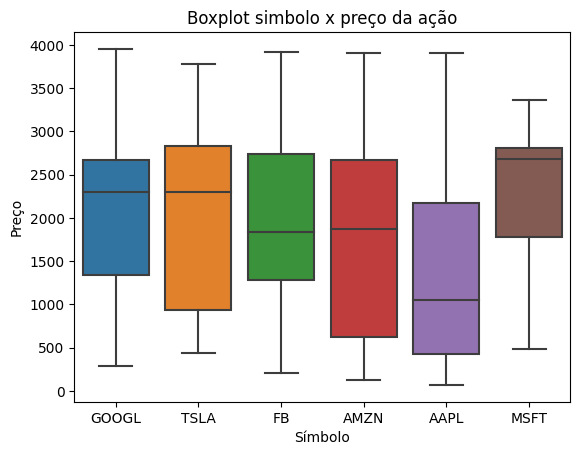

In [13]:
sns.boxplot(x = data['Símbolo'],y=data['Preço']) #plota boxplot
plt.title("Boxplot simbolo x preço da ação")

In [14]:
dados_ativos = pd.get_dummies(data,columns=['Símbolo']) # transforma variaveis categóricas em true ou false

In [15]:
dados_ativos # exibe dados após transformação

,Preço,Volume,Capitalização de mercado,Símbolo_AAPL,Símbolo_AMZN,Símbolo_FB,Símbolo_GOOGL,Símbolo_MSFT,Símbolo_TSLA
0,2217.813341,452893,3.377414e+11,False,False,False,True,False,False
1,2874.997997,2147491,1.246742e+12,False,False,False,False,False,True
2,2430.915335,2729726,1.158685e+12,False,False,False,True,False,False
3,2202.288573,3617666,4.834067e+11,False,False,True,False,False,False
4,1723.436457,3133384,1.869086e+12,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
95,773.605880,1590000,1.899144e+12,False,False,False,False,False,True
96,2366.726092,3669086,1.883342e+12,True,False,False,False,False,False
97,129.424807,4190045,1.600413e+12,False,True,False,False,False,False
98,3324.313115,2629409,1.264591e+12,True,False,False,False,False,False


In [16]:
kmeans = KMeans(n_clusters=4) # cria 4 clusters
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [17]:
sse = kmeans.inertia_ # métrica inertia
print("SSE",sse)

SSE 2.1166718178209715e+24


In [19]:
# Visualizar os resultados do agrupamento
labels = kmeans.labels_ # Nomes dos itens do agrupamento
centroids = kmeans.cluster_centers_ # Valores do interior do agrupamento

Text(0, 0.5, 'Preço')

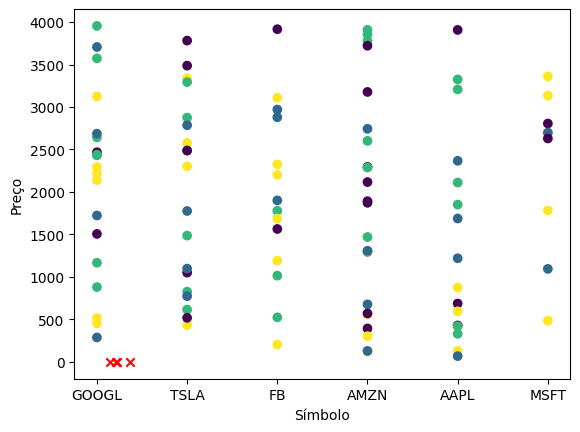

In [20]:
# Plotando o gráfico das visualizações

plt.scatter(data['Símbolo'],data['Preço'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Símbolo")
plt.ylabel("Preço")

In [21]:
# Passo 7: Analisar os grupos resultantes
dados_ativos['Grupo'] = labels
grouped_data = dados_ativos.groupby('Grupo').mean()
print(grouped_data)

             Preço        Volume  Capitalização de mercado  Símbolo_AAPL  \
Grupo                                                                      
0      2148.983782  3.010593e+06              7.513731e+11      0.136364   
1      1721.803918  2.772412e+06              1.812930e+12      0.181818   
2      2183.592209  2.246092e+06              1.276449e+12      0.214286   
3      1623.416262  2.418792e+06              3.130055e+11      0.107143   

       Símbolo_AMZN  Símbolo_FB  Símbolo_GOOGL  Símbolo_MSFT  Símbolo_TSLA  
Grupo                                                                       
0          0.363636    0.090909       0.090909      0.090909      0.227273  
1          0.227273    0.136364       0.181818      0.090909      0.181818  
2          0.214286    0.107143       0.250000      0.000000      0.214286  
3          0.142857    0.214286       0.214286      0.178571      0.142857  


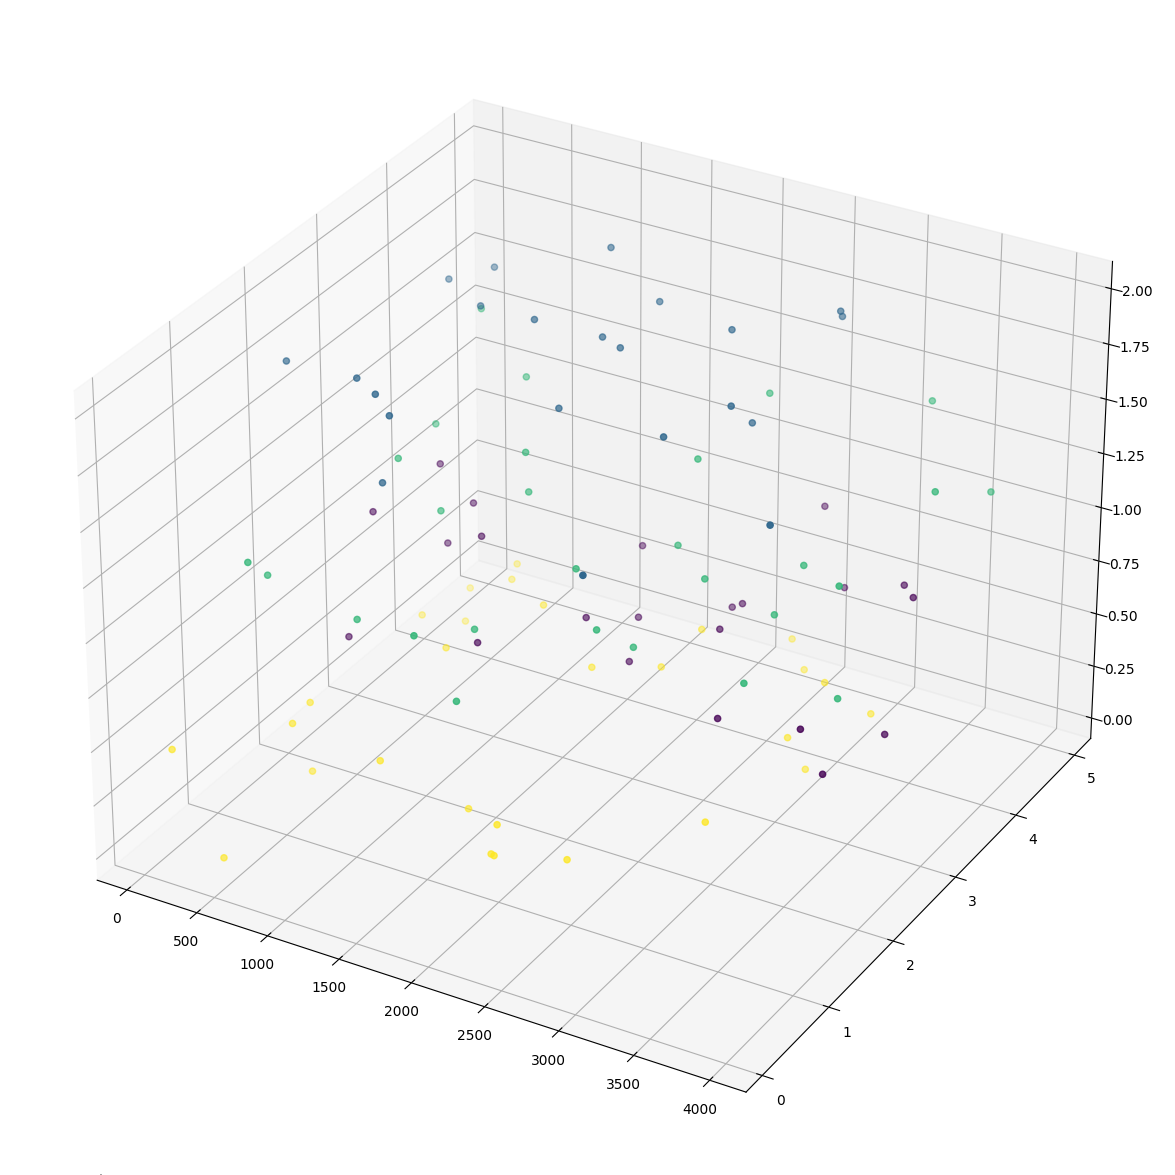

In [22]:
# Criando o gráfico em 3D
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Preço'], data['Volume'], data['Capitalização de mercado'],c=labels)
